# Importando bibliotecas

In [96]:
!pip install shap

In [249]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score as asc, classification_report as cr
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# DATASET *(from kaagle)*

In [146]:
# leitura dataset
dfp= pd.read_parquet(r'C:\Users\Letic\OneDrive\Documents\Projetos3\archive\archive\heart_disease.parquet')

dfp

In [153]:
dfp.rename(columns={
    'Smoker': 'Fumantes',
    'Age': 'Idade',
    'HeartDiseaseorAttack':'Problemas cardíacos',
    'PhysActivity': "Atividade física",
    'Sex': 'Sexo',
    'GenHlth': 'Saúde geral',
    'Fruits': 'Consumo de frutas',
    'Veggies': 'Consumo de legumes e verduras',
    'HighBP': 'Pressão alta',
    'HighChol': 'Colesterol alto',
    'BMI': 'IMC',
    'CholCheck': 'Checagem de colesterol',
    'Stroke': 'AVC',
    'HvyAlcoholConsump': 'Alto consumo de álcool',
    'AnyHealthcare': 'Plano de saúde',
    'NoDocbcCost': 'Não visitou médico por custo',
    'MentHlth': 'Saúde mental',
    'PhysHlth': 'Saúde física',
    'DiffWalk': 'Dificuldade de andar',
    'Income': 'Renda',
    'Education': 'Formação',
    'Diabetes': 'Diabético'
    }, inplace=True)

In [156]:
# Transformando variável de idade
age = {1:'18-24',2:'25-29',3:'30-34',4:'35-39',5:'40-44',6:'45-49',7:'50-54',8:'55-59',9:'60-64',10:'65-69',11:'70-74',12:'75-79', 13:'80+'}
dfp['Idade']= dfp['Idade'].replace(age)

In [158]:
# Transformando variável de renda
income = {1: 'Menos de 10000', 2:'10000-$14000' , 3:'15000-$19999', 4:'20000-$24999', 5:'25000-$34999', 6:'35000-$49999', 7:'50000-$74999', 8:'75000+'}
dfp['Renda']= dfp['Renda'].replace(income)

In [160]:
# Transformando variável de Educação
education = {1:'Nunca foi a escola (ou apenas foi à pré-escola)', 2:'1-8 ano', 3:'9-11 ano',4:'12 ano/Médio completo', 5:'1-3 Superior', 6:'4+ Superior'}
dfp['Formação'] = dfp['Formação'].replace(education)

In [162]:
# Transformando variável de Educação
diabetes = {0: 'Não possui diabetes', 1:'Pré-diabético', 2:'Diabético'}
dfp['Diabético'] = dfp['Diabético'].replace(diabetes)

In [164]:
# Transformando variável de IMC
def categorizar_bmi(valor):
    if valor < 16:
        return 'Abaixo do peso'
    elif 16 <= valor < 18.5:
        return 'Peso normal baixo'
    elif 18.5 <= valor < 25:
        return 'Peso normal'
    elif 25 <= valor < 30:
        return 'Sobrepeso'
    elif 30 <= valor < 35:
        return 'Obesidade Grau I'
    elif 35 <= valor < 40:
        return 'Obesidade Grau II'
    else:
        return 'Obesidade Grau III'

dfp['IMC'] = dfp['IMC'].apply(categorizar_bmi)

In [166]:
# Transformando variável de Saúde
saude_geral={1:'Execelente',2:'Boa',3:'Moderada',4:'Ruim',5:'Pobre'}
dfp['Saúde geral'] = dfp['Saúde geral'].replace(saude_geral)

In [168]:
# Transformando as variáveis em dummies
dfp_d= pd.get_dummies(dfp)
dfp_d

,Problemas cardíacos,Pressão alta,Colesterol alto,Checagem de colesterol,Fumantes,AVC,Atividade física,Consumo de frutas,Consumo de legumes e verduras,Alto consumo de álcool,...,Formação_9-11 ano,Formação_Nunca foi a escola (ou apenas foi à pré-escola),Renda_10000-$14000,Renda_15000-$19999,Renda_20000-$24999,Renda_25000-$34999,Renda_35000-$49999,Renda_50000-$74999,Renda_75000+,Renda_Menos de 10000
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,True,False,False,False,False,False,False
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,True,False,False,False,False,False,True,False,False,False
4,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False
253676,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
253677,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
253678,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [170]:
# Transformando resultado dos dummies (True and False -> 1 and 0)
dfp_d = dfp_d.map(lambda x: 1 if x is True else (0 if x is False else x))
dfp_d

,Problemas cardíacos,Pressão alta,Colesterol alto,Checagem de colesterol,Fumantes,AVC,Atividade física,Consumo de frutas,Consumo de legumes e verduras,Alto consumo de álcool,...,Formação_9-11 ano,Formação_Nunca foi a escola (ou apenas foi à pré-escola),Renda_10000-$14000,Renda_15000-$19999,Renda_20000-$24999,Renda_25000-$34999,Renda_35000-$49999,Renda_50000-$74999,Renda_75000+,Renda_Menos de 10000
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
253676,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
253677,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
253678,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [171]:
dfp_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 58 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Problemas cardíacos                                       253680 non-null  float64
 1   Pressão alta                                              253680 non-null  float64
 2   Colesterol alto                                           253680 non-null  float64
 3   Checagem de colesterol                                    253680 non-null  float64
 4   Fumantes                                                  253680 non-null  float64
 5   AVC                                                       253680 non-null  float64
 6   Atividade física                                          253680 non-null  float64
 7   Consumo de frutas                                         253680 non-null  float64
 8   Cons

In [181]:
X = dfp_d.drop(['Problemas cardíacos'], axis=1)
X

,Pressão alta,Colesterol alto,Checagem de colesterol,Fumantes,AVC,Atividade física,Consumo de frutas,Consumo de legumes e verduras,Alto consumo de álcool,Plano de saúde,...,Formação_9-11 ano,Formação_Nunca foi a escola (ou apenas foi à pré-escola),Renda_10000-$14000,Renda_15000-$19999,Renda_20000-$24999,Renda_25000-$34999,Renda_35000-$49999,Renda_50000-$74999,Renda_75000+,Renda_Menos de 10000
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,0,0,1,0,0,0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
253676,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
253677,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
253678,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [183]:
y = dfp_d['Problemas cardíacos']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: Problemas cardíacos, Length: 253680, dtype: float64

In [185]:
# divisão treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [189]:
# quantidade cada coluna antes do balanceamento
dic = {}
for col in X_treino.columns:
    dic[col] = X_treino[col].value_counts()[0]
dataframe_pre_balanceamento = pd.DataFrame(list(dic.items()), columns=['Coluna', 'Contagem'])
dataframe_pre_balanceamento

,Coluna,Contagem
0,Pressão alta,115834
1,Colesterol alto,116743
2,Checagem de colesterol,7555
3,Fumantes,113015
4,AVC,194756
5,Atividade física,49353
6,Consumo de frutas,74130
7,Consumo de legumes e verduras,38177
8,Alto consumo de álcool,191577
9,Plano de saúde,9977


In [195]:
# quantidade de linhas pré-balanceamento
linhas_pb = X_treino.shape[0]
print(linhas_pb)

202944


# normalizando - (minmax)
- pra deixar tudo em float

In [198]:
normalizacao = MinMaxScaler()
X_treino_normalizado = normalizacao.fit_transform(X_treino)

In [200]:
X_teste_normalizado = normalizacao.transform(X_teste)
X_teste_normalizado 

array([[1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [204]:
# transformando treino e teste em um DataFrame
X_teste_normalizado = pd.DataFrame(X_teste_normalizado)
X_treino_normalizado = pd.DataFrame(X_treino_normalizado)

In [208]:
# retornando teste
X_teste_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50736 non-null  float64
 1   1       50736 non-null  float64
 2   2       50736 non-null  float64
 3   3       50736 non-null  float64
 4   4       50736 non-null  float64
 5   5       50736 non-null  float64
 6   6       50736 non-null  float64
 7   7       50736 non-null  float64
 8   8       50736 non-null  float64
 9   9       50736 non-null  float64
 10  10      50736 non-null  float64
 11  11      50736 non-null  float64
 12  12      50736 non-null  float64
 13  13      50736 non-null  float64
 14  14      50736 non-null  float64
 15  15      50736 non-null  float64
 16  16      50736 non-null  float64
 17  17      50736 non-null  float64
 18  18      50736 non-null  float64
 19  19      50736 non-null  float64
 20  20      50736 non-null  float64
 21  21      50736 non-null  float64
 22

In [210]:
# renomeando treino e teste normalizados para as colunas originais
colunas_originais = [
    'Pressão alta', 'Colesterol alto', 'Checagem de colesterol', 
    'Fumantes', 'AVC', 'Atividade física', 'Consumo de frutas', 'Consumo de legumes e verduras',
    'Alto consumo de álcool', 'Plano de saúde', 'Não visitou médico por custo', 'Saúde mental',
    'Saúde física', 'Dificuldade de andar', 'Sexo', 'IMC_Abaixo do peso', 'IMC_Obesidade Grau I',
    'IMC_Obesidade Grau II', 'IMC_Obesidade Grau III', 'IMC_Peso normal', 'IMC_Peso normal baixo',
    'IMC_Sobrepeso', 'Diabético_Diabético', 'Diabético_Não possui diabetes', 'Diabético_Pré-diabético',
    'Saúde geral_Boa', 'Saúde geral_Execelente', 'Saúde geral_Moderada', 'Saúde geral_Pobre',
    'Saúde geral_Ruim', 'Idade_18-24', 'Idade_25-29', 'Idade_30-34', 'Idade_35-39', 'Idade_40-44',
    'Idade_45-49', 'Idade_50-54', 'Idade_55-59', 'Idade_60-64', 'Idade_65-69', 'Idade_70-74',
    'Idade_75-79', 'Idade_80+', 'Formação_1-3 Superior', 'Formação_1-8 ano', 'Formação_12 ano/Médio completo',
    'Formação_4+ Superior', 'Formação_9-11 ano', 'Formação_Nunca foi a escola (ou apenas foi à pré-escola)',
    'Renda_10000-$14000', 'Renda_15000-$19999', 'Renda_20000-$24999', 'Renda_25000-$34999',
    'Renda_35000-$49999', 'Renda_50000-$74999', 'Renda_75000+', 'Renda_Menos de 10000'

]

# Atribuindo os nomes às colunas do DataFrame normalizado
X_treino_normalizado.columns = colunas_originais
X_teste_normalizado.columns = colunas_originais

In [218]:
# verificando os tipos
print(X_treino_normalizado.info())
X_teste_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 57 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Pressão alta                                              202944 non-null  float64
 1   Colesterol alto                                           202944 non-null  float64
 2   Checagem de colesterol                                    202944 non-null  float64
 3   Fumantes                                                  202944 non-null  float64
 4   AVC                                                       202944 non-null  float64
 5   Atividade física                                          202944 non-null  float64
 6   Consumo de frutas                                         202944 non-null  float64
 7   Consumo de legumes e verduras                             202944 non-null  float64
 8   Alto

# BALANCEAMENTO COM SMOTEEN (OVERSAMPLING)

In [221]:
# balanceando dados de treino
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=42, sampling_strategy='all')

X_balanceado, y_balanceado = smoteenn.fit_resample(X_treino_normalizado, y_treino)

In [222]:
# verificando a quantidade pós balanceamento
dic = {}
for col in X_balanceado.columns:
    dic[col] = X_treino[col].value_counts()[0]
dataframe_pos_balanceamento = pd.DataFrame(list(dic.items()), columns=['Coluna', 'Contagem'])
dataframe_pos_balanceamento

,Coluna,Contagem
0,Pressão alta,115834
1,Colesterol alto,116743
2,Checagem de colesterol,7555
3,Fumantes,113015
4,AVC,194756
5,Atividade física,49353
6,Consumo de frutas,74130
7,Consumo de legumes e verduras,38177
8,Alto consumo de álcool,191577
9,Plano de saúde,9977


In [245]:
# quantidade de linhas pós-balanceamento
linhas_pos_b = X_balanceado.shape[0]
print(linhas_pos_b)

299204


# KNN

In [226]:
knn = KNeighborsClassifier()

In [227]:
knn.fit(X_balanceado, y_balanceado)

KNeighborsClassifier()

In [228]:
y_pred_teste = knn.predict(X_teste_normalizado)

In [229]:
# Avaliação dos resultados - teste
knn_report_teste = classification_report(y_teste, y_pred_teste)

print(knn_report_teste)

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     45957
         1.0       0.21      0.74      0.32      4779

    accuracy                           0.71     50736
   macro avg       0.58      0.72      0.57     50736
weighted avg       0.89      0.71      0.77     50736



In [230]:
y_pred_treino = knn.predict(X_treino_normalizado) #treino

In [231]:
# Avaliação dos resultados - treino
knn_report_treino = classification_report(y_treino, y_pred_treino)

print(knn_report_treino)

              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85    183830
         1.0       0.28      0.97      0.43     19114

    accuracy                           0.76    202944
   macro avg       0.64      0.85      0.64    202944
weighted avg       0.93      0.76      0.81    202944



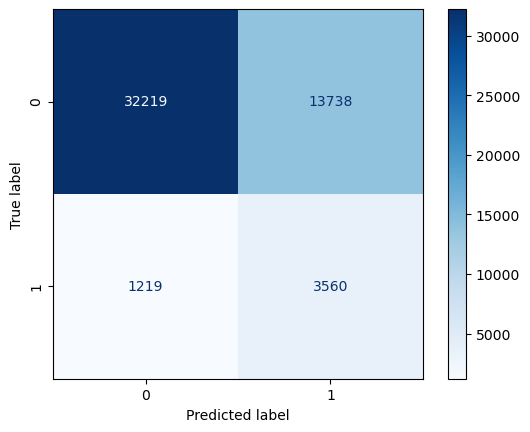

In [269]:
cm = confusion_matrix(y_teste, y_pred_teste)

# Visualizando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.yticks(rotation=90)
plt.show()


## Usando o pickle

In [61]:
import pickle

In [63]:
knn_report_teste = classification_report(y_teste, y_pred_teste, output_dict=True)
knn_report_treino = classification_report(y_treino, y_pred_treino, output_dict=True)

In [64]:
knn

KNeighborsClassifier()

In [65]:
# Shap em uma amostra de 2%
x_shap = X_teste_normalizado.sample(frac = 0.02, random_state=42)

from matplotlib import pyplot as plt
import shap

explainer_knn = shap.KernelExplainer(knn.predict, shap.sample(x_shap, 100))
shap_values_knn = explainer_knn.shap_values(x_shap, nsamples=100)

  0%|          | 0/1015 [00:00<?, ?it/s]

C:\Users\Letic\anaconda3\Lib\site-packages\sklearn\linear_model\_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.073e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
C:\Users\Letic\anaconda3\Lib\site-packages\sklearn\linear_model\_least_angle.py:718: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 90 iterations, alpha=2.992e-03, previous alpha=2.900e-03, with an active set of 41 regressors.
  warnings.warn(
C:\Users\Letic\anaconda3\Lib\site-packages\sklearn\linear_model\_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 38 iterations, i.e. alpha=2.110e-04, with an active set of 36 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduc

In [66]:
filename = 'KNN_Balanced.pkl'

# Salvando o modelo, SHAP values e o explainer em um arquivo pickle
with open(filename, 'wb') as file:
    pickle.dump({
        'model': knn,
        'explainer': explainer_knn,
        'shap_values': shap_values_knn,
        'x_shap': x_shap,
        'report_train': knn_report_treino,
        'report_test': knn_report_teste
    }, file)

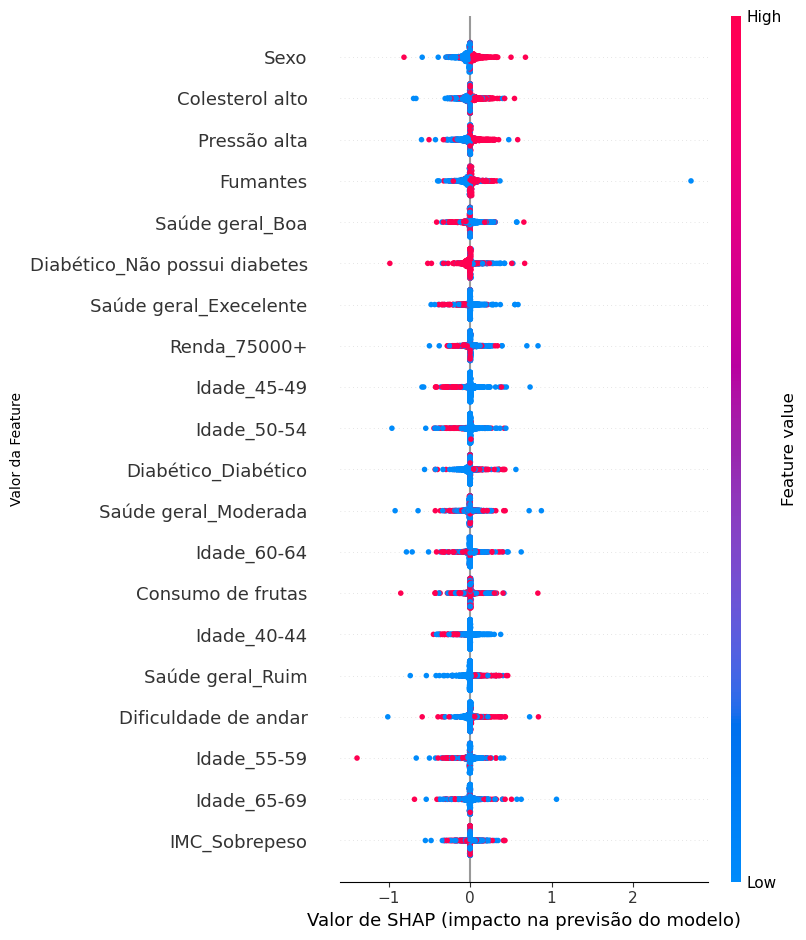

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
shap.summary_plot(shap_values_knn, x_shap, show=False)

ax.set_xlabel('Valor de SHAP (impacto na previsão do modelo)')
ax.set_ylabel('Valor da Feature')

plt.show()

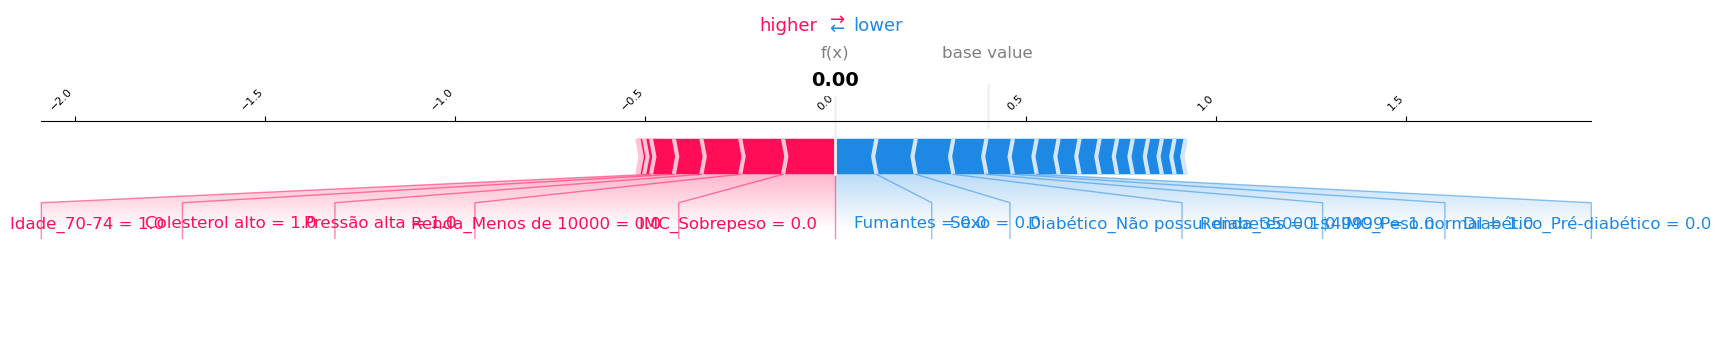

In [68]:
shap.force_plot(explainer_knn.expected_value, shap_values_knn[1], x_shap.iloc[1, :], matplotlib = True, show=False)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=1)
plt.show()